In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [44]:
# Create pandas dataframe from csv
df = pd.read_csv("../Material/Data/WFPP.csv", sep=",", header=None, names=["ID", "Name", "Pseudonyms", "Link", "Picture", "Jobs", "Lived in", "Born", "Died"])

In [45]:
# Helper function that renders the value of a bar on the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 0.25
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="center", size=10) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [46]:
# Print a short overview of the dataframe
df

,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Born,Died
0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,director|writer>journalist,England,1853,1931
1,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner>business co-owner|company dir...,England|United States,May 15 1868,1937
2,9728,Emilia Saleny,Josefina Emilia Saleny|Emilia Saleny Ferrari,https://wfpp.columbia.edu/person/emilia-saleny-2/,https://wfpp.columbia.edu/wp-content/uploads/2...,educator>acting teacher|director|actress>film ...,Argentina,June 26 or October 16? 1894,August 22 1978
3,1353,Agnes Gavin,Agnes Kurtz|Agnes Adele Wangenheim,https://wfpp.columbia.edu/person/agnes-gavin/,NaN,actress>film actress|writer>scenario writer|wr...,Australia,1872,January 9 1948
4,12539,Beatrice Maude Tildesley,NaN,https://wfpp.columbia.edu/person/beatrice-maud...,https://wfpp.columbia.edu/wp-content/uploads/2...,critic>film critic|film society co-founder|sec...,Australia,September 27 1886,January 26 1977
...,...,...,...,...,...,...,...,...,...
295,1631,Wanda Tuchock,NaN,https://wfpp.columbia.edu/person/wanda-tuchock/,NaN,adapter|director>co-director|filmmaker>documen...,United States,March 20 1898,February 10 1985
296,1632,Winifred Dunn,Mrs. Harold Swartz,https://wfpp.columbia.edu/person/winifred-dunn/,https://wfpp.columbia.edu/wp-content/uploads/C...,editor>scenario editor|writer>screenwriter|tit...,United States,1898/1899,Unknown
297,15052,Winnifred Eaton,Onoto Watanna|Winnifred Eaton Reeve|Winnifred ...,https://wfpp.columbia.edu/person/winnifred-eaton/,https://wfpp.columbia.edu/wp-content/uploads/2...,adapter|writer>journalist|literary advisor|wri...,United States,August 21 1875,April 8 1954
298,5,Zora Neale Hurston,NaN,https://wfpp.columbia.edu/person/zora-neale-hu...,https://wfpp.columbia.edu/wp-content/uploads/H...,director|filmmaker>ethnographic filmmaker|writ...,United States,January 7 1891,January 28 1960


In [47]:
# Split up Country 1|Country 2| Country 3|... values into multiple rows to properly count the countries each woman lived in
# Don't know exactly what code does, stackoverflow magic
df = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Jobs', 'Born', 'Died'])
    .stack()
    .str.split('|', expand=True)
    .stack().unstack(-2)
    .reset_index(-1, drop=True)
    .reset_index())

In [48]:
# Group by the countries each person lived in and count it
df_countries = df.groupby("Lived in", as_index=False).count()
df_countries.head()

,Lived in,ID,Name,Pseudonyms,Link,Picture,Jobs,Born,Died
0,Argentina,1,1,1,1,1,1,1,1
1,Australia,15,15,11,15,11,15,15,15
2,Austria,3,3,3,3,2,3,3,3
3,Brazil,3,3,3,3,3,3,3,3
4,Canada,8,8,7,8,7,8,8,8


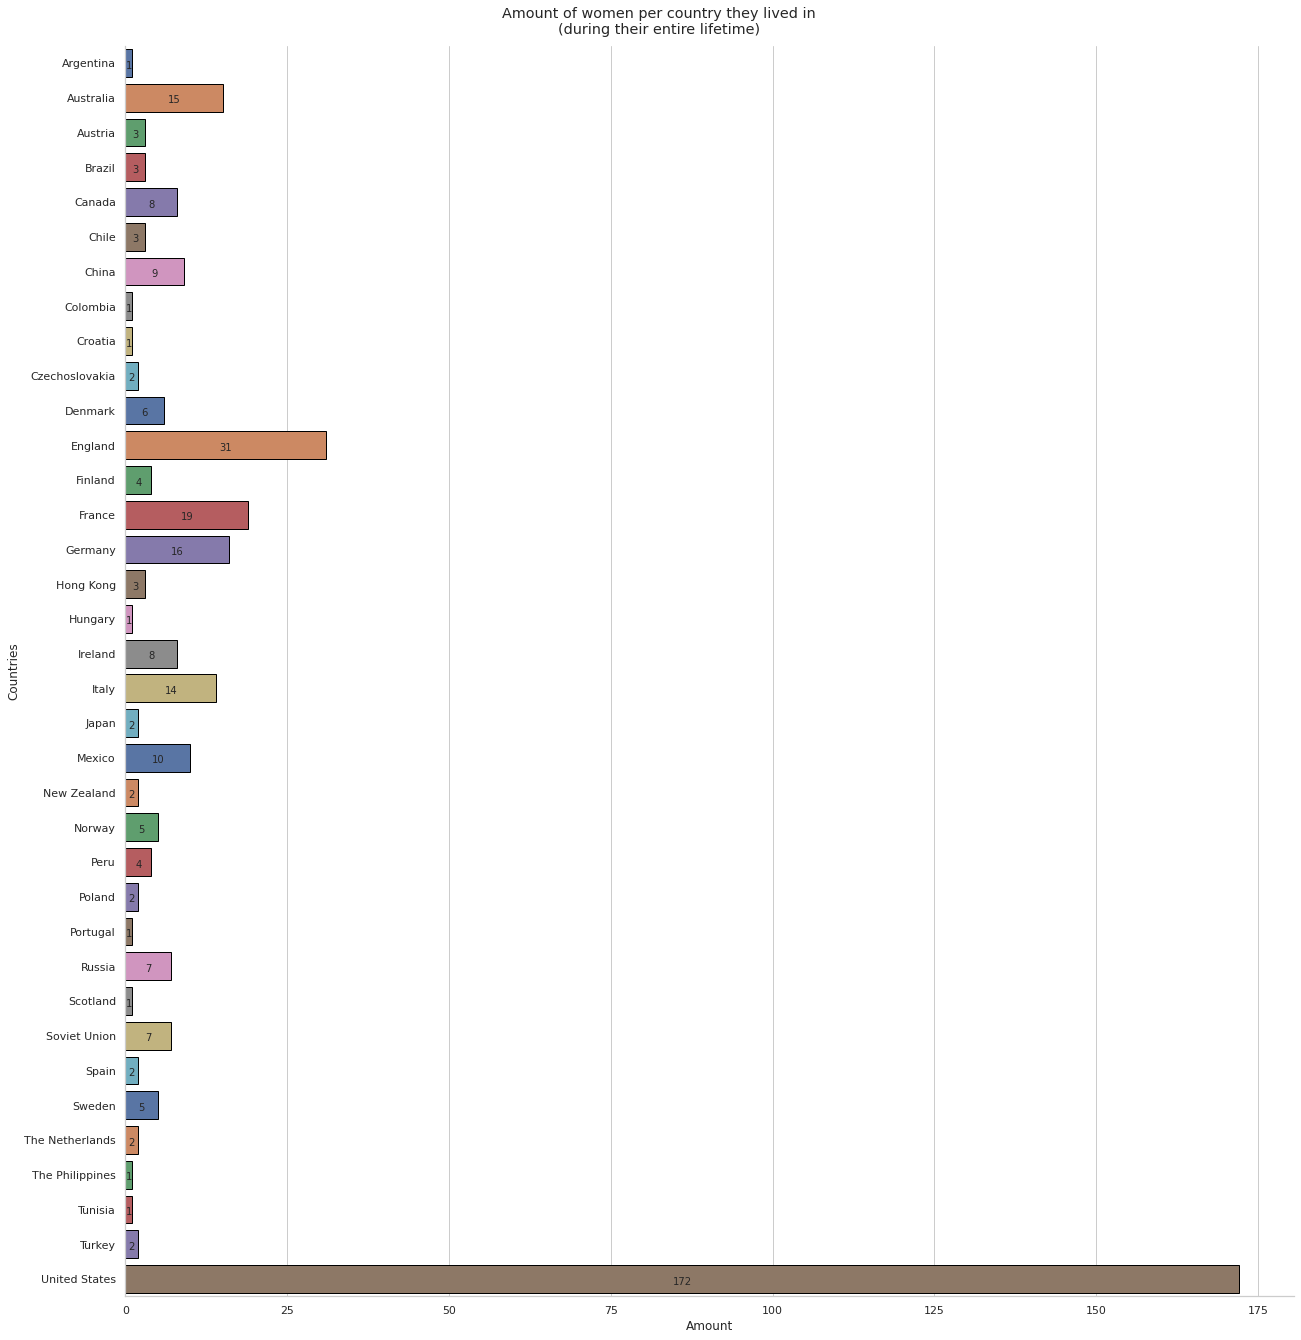

In [49]:
# Pre style setting (can be changed depending on what looks more appropriate)
sns.set_style("whitegrid")
sns.set_context("notebook")
# Render a bar plot
country_plt = sns.catplot(
    x="ID",
    y="Lived in", 
    data=df_countries, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18, 
    )
country_plt.set_xlabels("Amount")
country_plt.set_ylabels("Countries")
country_plt.fig.suptitle("Amount of women per country they lived in\n(during their entire lifetime)", y=1.02)
show_values_on_bars(country_plt.axes)

# If plot is ok, save it to a file
plt.savefig('../Plots/country_plot.png', bbox_inches='tight')